## Q. scipy.integrate.solve_ivp를 이용하여 Lorenz equation 표현

### Lorenz equation

로렌즈 방정식은 $x(t),y(t),z(t)$ 세 변수에 대한 1차 비선형 연립 상미분 방정식이다.

 세 개의 매개변수 $\sigma, \rho, \beta$ 에 의존한다.

$${\displaystyle {\dot {x}}=\sigma (y-x)}\\
{\displaystyle {\dot {y}}=x(\rho -z)-y}\\
{\displaystyle {\dot {z}}=xy-\beta z}$$

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.integrate import solve_ivp
import sympy

In [4]:
def f(t, xyz):
    x, y, z = xyz
    return [sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z]

In [5]:
xyz0 = [1.0, 1.0, 1.0]
t = (0, 25)

로렌츠 본 원문에서 사용된 매개변수 값들은 다음과 같다.

$$\sigma=10, \: \beta=\frac{8}{3}, \: \rho=28 $$

In [15]:
rho, sigma, beta = 28, 8, 8/3.0

xyz1 = solve_ivp(f, t, xyz0, t_eval=np.linspace(0,25,10000))

In [16]:
rho, sigma, beta = rho, sigma, 0.6*beta

xyz2 = solve_ivp(f, t, xyz0, t_eval=np.linspace(0,25,10000))

In [17]:
rho, sigma, beta = rho, 2*sigma, 0.6*beta

xyz3 = solve_ivp(f, t, xyz0, t_eval=np.linspace(0,25,10000))

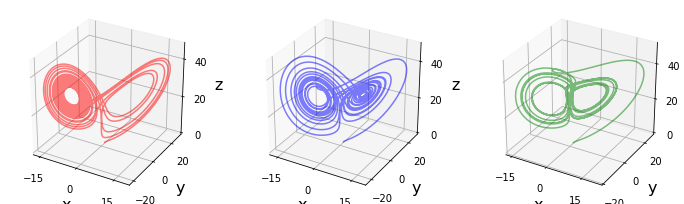

In [18]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5), subplot_kw={'projection': '3d'})

for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz.y[0], xyz.y[1], xyz.y[2], c, alpha=0.5)
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.set_zlabel('z', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])